In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [2]:
X,y = make_moons(n_samples=250, noise=0.05, random_state=42)

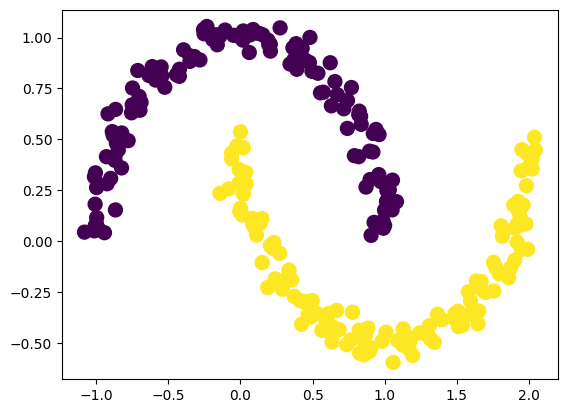

In [3]:
plt.scatter(X[:,0],X[:,1], c=y, s=100)
plt.show()

In [4]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

/Users/suraj/Documents/Deep learning/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
model.get_weights()[0]

array([[ 0.4453979 , -0.29498932,  0.23933882,  0.04652119,  0.21158594,
         0.12855548, -0.3119553 ,  0.57424134,  0.05530018, -0.10251498],
       [-0.3070086 , -0.14753973,  0.46896476, -0.24700749,  0.5247428 ,
        -0.12027949, -0.11311436,  0.02661002,  0.11544847,  0.46003896]],
      dtype=float32)

In [7]:
old_weights = model.get_weights()[0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4900 - loss: 0.7622  
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4900 - loss: 0.7487 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4900 - loss: 0.7357 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4900 - loss: 0.7267 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4900 - loss: 0.7171 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4900 - loss: 0.7107 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4900 - loss: 0.7059 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4900 - loss: 0.7012 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4900 - loss: 0.6972 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4900 - loss: 0.6945 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4900 - loss: 0.6922 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4900 - lo

In [10]:
new_weights = model.get_weights()[0]

In [11]:
model.optimizer.get_config()["learning_rate"]

0.0010000000474974513

In [12]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [13]:
gradient

array([[ -584.22174,  -737.11487,  -603.27057,   479.32278,  -383.91602,
         -652.72656,   609.47784,  -543.3264 ,   742.27124,   668.92084],
       [ 1077.9689 ,  1016.836  ,   900.40955,  -598.07336,   598.42615,
          988.9525 , -1049.4377 ,   989.04443, -1099.3765 , -1076.4724 ]],
      dtype=float32)

In [14]:
percent_change

array([[ 131.1685  ,  249.8785  ,  252.05716 , 1030.3323  ,  181.44685 ,
         507.73923 ,  195.37346 ,   94.616394, 1342.2584  ,  652.5104  ],
       [ 351.12012 ,  689.1947  ,  191.9994  ,  242.12762 ,  114.04181 ,
         822.2121  ,  927.7671  , 3716.8127  ,  952.2659  ,  233.99596 ]],
      dtype=float32)

In [15]:
old_weights

array([[ 0.4453979 , -0.29498932,  0.23933882,  0.04652119,  0.21158594,
         0.12855548, -0.3119553 ,  0.57424134,  0.05530018, -0.10251498],
       [-0.3070086 , -0.14753973,  0.46896476, -0.24700749,  0.5247428 ,
        -0.12027949, -0.11311436,  0.02661002,  0.11544847,  0.46003896]],
      dtype=float32)

In [16]:
new_weights

array([[ 1.0296197 ,  0.44212556,  0.8426094 , -0.43280163,  0.59550196,
         0.78128207, -0.92143315,  1.1175678 , -0.6869711 , -0.77143586],
       [-1.3849776 , -1.1643758 , -0.43144482,  0.3510659 , -0.07368338,
        -1.1092321 ,  0.93632334, -0.9624345 ,  1.214825  ,  1.5365114 ]],
      dtype=float32)

In [17]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
old_weights = model.get_weights()[0]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5400 - loss: 0.6918
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7650 - loss: 0.6883 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7800 - loss: 0.6841 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7850 - loss: 0.6779 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8200 - loss: 0.6688 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7700 - loss: 0.6553 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8050 - loss: 0.6343 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8050 - loss: 0.6077 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8400 - loss: 0.5706 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8350 - loss: 0.5307 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8450 - loss: 0.5019 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8500 - loss

In [ ]:
new_weights = model.get_weights()[0]

In [ ]:
model.optimizer.get_config()["learning_rate"]

0.001

In [ ]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [ ]:
gradient

array([[ 6.685495  , -3.4646986 , -5.3832526 ,  6.741613  , -6.8466363 ,
         5.8019753 , -6.013676  ,  2.311021  ,  0.31654534,  1.327753  ],
       [-5.534008  ,  2.8640625 ,  4.297107  , -6.487876  ,  6.334662  ,
        -5.206227  ,  0.72604764, -4.4065375 , -1.9274204 , -6.5084095 ]],
      dtype=float32)

In [ ]:
percent_change

array([[ 1.1875801 ,  0.61953056,  1.5359294 ,  1.9122909 ,  1.6018827 ,
         1.2191677 ,  5.3679805 ,  0.7799734 ,  0.15018749,  0.25854072],
       [ 5.258102  ,  0.9604039 ,  1.1871884 ,  1.2909728 ,  1.2937336 ,
         0.87578124, 26.933157  , 12.894475  ,  1.8821074 ,  2.2091355 ]],
      dtype=float32)

In [ ]:
old_weights

array([[-0.06470567,  0.38120002,  0.2564506 ,  0.4796242 , -0.41284758,
         0.12111282,  0.3640564 , -0.11997336, -0.7036418 , -0.12918228],
       [ 0.4177161 , -0.646973  ,  0.5538413 ,  0.14968556, -0.1020028 ,
        -0.25845426, -0.1095776 ,  0.22031492, -0.01622504, -0.3014395 ]],
      dtype=float32)

In [ ]:
new_weights

array([[-0.00357266,  0.42682663,  0.36751232,  0.6510883 , -0.47869346,
         0.22171871,  0.4815479 , -0.20610414, -0.73377985, -0.09355866],
       [ 0.4225647 , -0.76475453,  0.56343955,  0.08604728, -0.1019215 ,
        -0.35053518, -0.19012658,  0.28164935,  0.21199906, -0.29813236]],
      dtype=float32)